In [1]:
# Start by importing packages we need:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the balancing authority to analyze:
ba_to_plot = 'CISO'

cooler_dir = r'C:\projects\rcp85cooler_ssp3'
hotter_dir = r'C:\projects\rcp85hotter_ssp3'
image_output_dir = r'C:\projects\images'

In [3]:
# Load in the raw data from the cooler scenario:
cooler_2081_df = pd.read_csv(os.path.join(cooler_dir, f'{ba_to_plot}_WRF_Hourly_Mean_Meteorology_2081.csv'), index_col=None, header=0)
cooler_2082_df = pd.read_csv(os.path.join(cooler_dir, f'{ba_to_plot}_WRF_Hourly_Mean_Meteorology_2082.csv'), index_col=None, header=0)
cooler_2083_df = pd.read_csv(os.path.join(cooler_dir, f'{ba_to_plot}_WRF_Hourly_Mean_Meteorology_2083.csv'), index_col=None, header=0)

# Concatenate the three dataframes together:
cooler_df = pd.concat([cooler_2081_df, cooler_2082_df, cooler_2083_df])

# Rename the T2 variable:
cooler_df.rename(columns={'T2': 'T2_Cooler'}, inplace=True)

# Subset to only the columns we need:
cooler_df = cooler_df[['Time_UTC', 'T2_Cooler']]

# Load in the raw data from the hotter scenario:
hotter_2081_df = pd.read_csv(os.path.join(hotter_dir, f'{ba_to_plot}_WRF_Hourly_Mean_Meteorology_2081.csv'), index_col=None, header=0)
hotter_2082_df = pd.read_csv(os.path.join(hotter_dir, f'{ba_to_plot}_WRF_Hourly_Mean_Meteorology_2082.csv'), index_col=None, header=0)
hotter_2083_df = pd.read_csv(os.path.join(hotter_dir, f'{ba_to_plot}_WRF_Hourly_Mean_Meteorology_2083.csv'), index_col=None, header=0)

# Concatenate the three dataframes together:
hotter_df = pd.concat([hotter_2081_df, hotter_2082_df, hotter_2083_df])

# Rename the T2 variable:
hotter_df.rename(columns={'T2': 'T2_Hotter'}, inplace=True)

# Subset to only the columns we need:
hotter_df = hotter_df[['Time_UTC', 'T2_Hotter']]

# Merge the two dataframes together based on a common "Time_UTC" variable:
merged_df = pd.merge(cooler_df, hotter_df, how='left', on=['Time_UTC'])

# Calculate the temperature difference:
merged_df["T2_Difference"] = (merged_df['T2_Hotter'] - merged_df['T2_Cooler']).round(2)

# Convert the time to a datetime variable:
merged_df['Time_UTC'] = pd.to_datetime(merged_df['Time_UTC'])

# Clean up what we're not using anymore:
del cooler_df, cooler_2081_df, cooler_2082_df, cooler_2083_df, hotter_df, hotter_2081_df, hotter_2082_df, hotter_2083_df

# Return the merged dataframe:
merged_df

,Time_UTC,T2_Cooler,T2_Hotter,T2_Difference
0,2081-01-01 00:00:00,290.90,292.68,1.78
1,2081-01-01 01:00:00,287.85,289.58,1.73
2,2081-01-01 02:00:00,286.99,288.68,1.69
3,2081-01-01 03:00:00,286.60,288.27,1.67
4,2081-01-01 04:00:00,286.30,287.94,1.64
...,...,...,...,...
26107,2083-12-31 19:00:00,287.35,288.86,1.51
26108,2083-12-31 20:00:00,288.10,289.63,1.53
26109,2083-12-31 21:00:00,288.52,290.03,1.51
26110,2083-12-31 22:00:00,288.64,290.12,1.48


In [14]:
# Define a function to compute the monthly-mean time series of T2 values and differences:
def process_monthly_data(merged_df):
    
    # Initiate empty lists to store the monthly-mean results:
    years = []
    months = []
    mean_t2_cooler = []
    mean_t2_hotter = []
    mean_t2_difference = []
    
    # Loop over the years:
    for year in range(2081, 2084):
        
        # Loop over the months:
        for month in range(1, 13):
                       
            # Subset the data to the given year/month combination:
            month_subset_df = merged_df.loc[(merged_df['Time_UTC'].dt.strftime('%Y') == str(year)) 
                                            & (merged_df['Time_UTC'].dt.strftime('%-m') == str(month))]
           
            # Store the output in a list:
            years.append(year)
            months.append(month)
            mean_t2_cooler.append(month_subset_df['T2_Cooler'].mean())
            print(month_subset_df['T2_Cooler'].mean())
            mean_t2_hotter.append(month_subset_df['T2_Hotter'].mean())
            mean_t2_difference.append(month_subset_df['T2_Difference'].mean())
            
            # Clean up what we're not using anymore:
            del month_subset_df
    
    # Convert the output to a dataframe:
    mean_df = pd.DataFrame(mean_t2_cooler, columns = ['T2_Cooler_Mean'])
    mean_df['T2_Hotter_Mean'] = mean_t2_hotter
    mean_df['T2_Difference_Mean'] = mean_t2_difference
    mean_df['Month'] = months
    mean_df['Year'] = years
    mean_df['Time'] = mean_df['Year'] + (mean_df['Month'] / 12)
    
    # Rearrange the variables:
    mean_df = mean_df[['Year', 'Month', 'Time', 'T2_Cooler_Mean', 'T2_Hotter_Mean', 'T2_Difference_Mean']]
    
    # Return the output dataframe:
    return mean_df

In [15]:
# Process the monthly-mean time series:
monthly_df = process_monthly_data(merged_df)

monthly_df

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


,Year,Month,Time,T2_Cooler_Mean,T2_Hotter_Mean,T2_Difference_Mean
0,2081,1,2081.083333,NaN,NaN,NaN
1,2081,2,2081.166667,NaN,NaN,NaN
2,2081,3,2081.250000,NaN,NaN,NaN
3,2081,4,2081.333333,NaN,NaN,NaN
4,2081,5,2081.416667,NaN,NaN,NaN
5,2081,6,2081.500000,NaN,NaN,NaN
6,2081,7,2081.583333,NaN,NaN,NaN
7,2081,8,2081.666667,NaN,NaN,NaN
8,2081,9,2081.750000,NaN,NaN,NaN
9,2081,10,2081.833333,NaN,NaN,NaN


In [6]:
# Define a function to plot mean time series:
def plot_monthly_data(ba_to_plot: str, monthly_df, image_output_dir: str, save_images=False):
        
    # Make the plot of monthly-mean temperatures:
    plt.figure(figsize=(25, 25))
    plt.subplot(211)
    plt.plot(monthly_df['Time'], monthly_df['T2_Cooler_Mean'], color = 'b', linestyle = '-', linewidth = 3, label = 'rcp85cooler_ssp3')
    plt.plot(monthly_df['Time'], monthly_df['T2_Hotter_Mean'], color = 'r', linestyle = '-', linewidth = 3, label = 'rcp85hotter_ssp3')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Monthly Mean Temperature [K]')
    plt.title('Monthly Mean Temperatures in ' + ba_to_plot)
    
    # Make the plot of monthly-mean temperature differences:
    plt.subplot(212)
    plt.plot(monthly_df['Time'], monthly_df['T2_Difference_Mean'], color = 'k', linestyle = '-', 
             linewidth = 3, label = 'rcp85hotter_ssp3 - rcp85cooler_ssp3')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Monthly Mean Temperature Difference [K]')
    plt.title('Monthly Mean Temperature Difference in ' + ba_to_plot)
       
    # If the 'save_images' flag is set to true then save the plot to a .png file:
    if save_images == True:
       filename = (ba_to_plot + '_rcp85_ssp3_monthly_mean_time_series.png')
       plt.savefig(os.path.join(image_output_dir, filename), dpi=75, bbox_inches='tight')

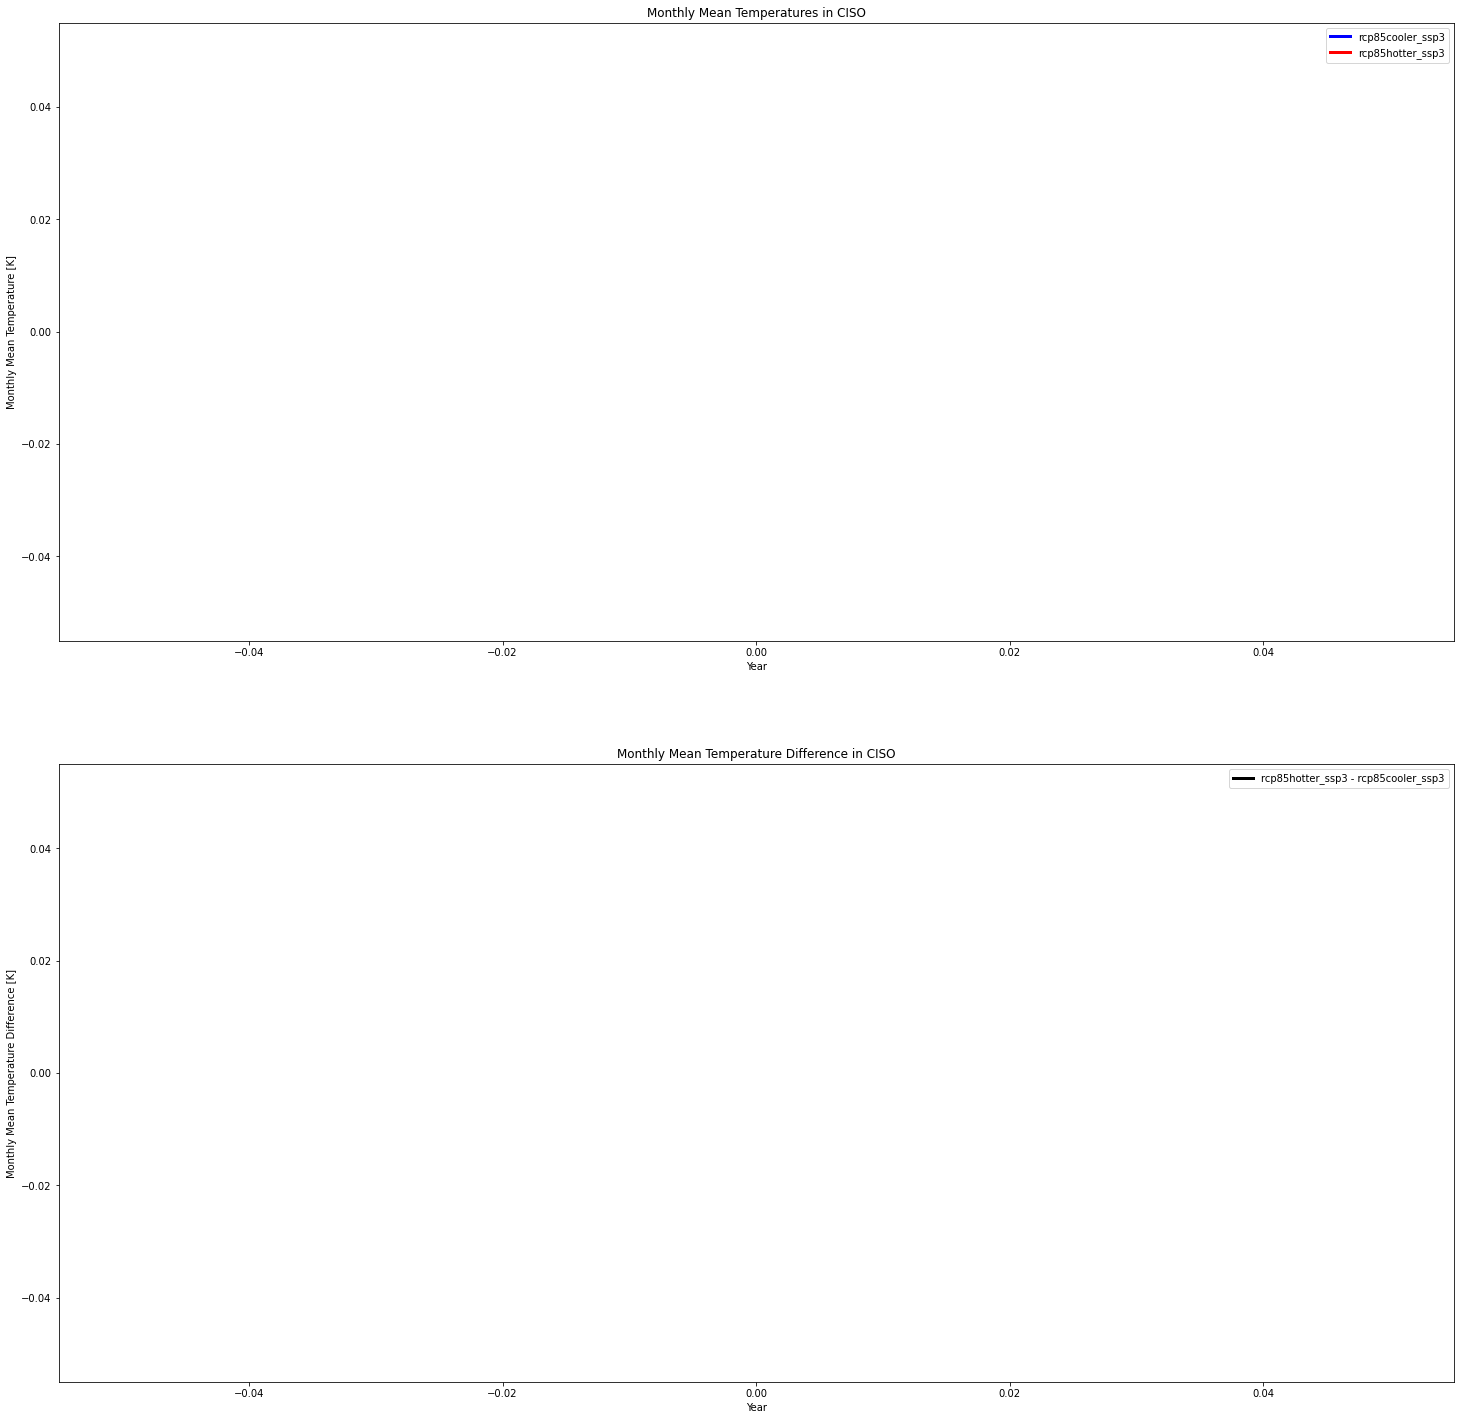

In [7]:
# Plot the monthly-mean time series:
a = plot_monthly_data(ba_to_plot = ba_to_plot, 
                      monthly_df = monthly_df, 
                      image_output_dir = image_output_dir, 
                      save_images = True)